# Explore the Data

In [1]:
import numpy as np
import pandas as pd
import prepare

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import nltk
import nltk.sentiment
from wordcloud import WordCloud

### Load the Data

In [2]:
blurbs = pd.read_csv('cleaned_book_blurbs.csv')

In [3]:
blurbs.head()

,genre,sub-genre,original,clean,stemmed,lemmatized
0,Horror,ghost-stories,"Designed to appeal to the book lover, the Macm...",designed appeal book lover macmillan collector...,design appeal book lover macmillan collector '...,designed appeal book lover macmillan collector...
1,Horror,ghost-stories,"Part of the Penguin Orange Collection, a limit...",part penguin orange collection limitedrun seri...,part penguin orang collect limitedrun seri twe...,part penguin orange collection limitedrun seri...
2,Horror,ghost-stories,Part of a new six-volume series of the best in...,part new sixvolume series best classic horror ...,part new sixvolum seri best classic horror sel...,part new sixvolume series best classic horror ...
3,Horror,ghost-stories,A USA TODAY BESTSELLER!An Indie Next Pick!An O...,usa today bestselleran indie next pickan octob...,usa today bestselleran indi next pickan octob ...,usa today bestselleran indie next pickan octob...
4,Horror,ghost-stories,From the New York Times best-selling author of...,new york times bestselling author southern boo...,new york time bestsel author southern book clu...,new york time bestselling author southern book...


In [4]:
blurbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21414 entries, 0 to 21413
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       21414 non-null  object
 1   sub-genre   21414 non-null  object
 2   original    21414 non-null  object
 3   clean       21414 non-null  object
 4   stemmed     21414 non-null  object
 5   lemmatized  21414 non-null  object
dtypes: object(6)
memory usage: 1003.9+ KB


### Prepare For Exploratory Analysis

The following function call will create several new features that can be used for exploration.

In [5]:
#blurbs = prepare.prep_for_exploration(blurbs)
#blurbs.head()

,genre,sub-genre,original,clean,stemmed,lemmatized,lem_char_count,lem_word_count,lem_unique_word_count,sentence_count,avg_words_per_sentence,sentiment,stopword_count,word_stopword_ratio
0,Horror,ghost-stories,"Designed to appeal to the book lover, the Macm...",designed appeal book lover macmillan collector...,design appeal book lover macmillan collector '...,designed appeal book lover macmillan collector...,1102,147,120,8,18,0.9582,96,0.65
1,Horror,ghost-stories,"Part of the Penguin Orange Collection, a limit...",part penguin orange collection limitedrun seri...,part penguin orang collect limitedrun seri twe...,part penguin orange collection limitedrun seri...,954,118,87,2,59,0.9100,55,0.47
2,Horror,ghost-stories,Part of a new six-volume series of the best in...,part new sixvolume series best classic horror ...,part new sixvolum seri best classic horror sel...,part new sixvolume series best classic horror ...,1260,173,138,7,25,-0.2144,85,0.49
3,Horror,ghost-stories,A USA TODAY BESTSELLER!An Indie Next Pick!An O...,usa today bestselleran indie next pickan octob...,usa today bestselleran indi next pickan octob ...,usa today bestselleran indie next pickan octob...,800,104,92,2,52,-0.9530,63,0.61
4,Horror,ghost-stories,From the New York Times best-selling author of...,new york times bestselling author southern boo...,new york time bestsel author southern book clu...,new york time bestselling author southern book...,603,77,74,5,15,-0.9726,28,0.36


Since the above operation took some time, go ahead and save the new df as a .csv

In [7]:
#blurbs.to_csv('blurbs_for_exploration.csv', index = False)

### Start Here

The following line of code loads the blurbs dataframe with the added features that was previously saved.

In [ ]:
blurbs = pd.read_csv('blurbs_for_exploration.csv')

### Split the Data

Exploration should only be done on the training data set.

In [3]:
train, test = train_test_split(blurbs, stratify = blurbs.genre, test_size = .25, random_state = 123)
train.shape, test.shape

((16061, 6), (5354, 6))

### Combine Blurbs

For exploration, I will combine all of the lemmatized blurbs into one mass of text for each genre. Don't forget to only use training data.

In [24]:
#Create mass of text for horror genre
horror_blurbs = train[train.genre == 'Horror']
horror_words = ' '.join(horror_blurbs.lemmatized)

In [25]:
#Create mass of text for romance genre
romance_blurbs = train[train.genre == 'Romance']
romance_words = ' '.join(romance_blurbs.lemmatized)

In [26]:
#Create mass of text for Mystery and Crime genre
mystery_blurbs = train[train.genre == 'Mystery and Crime']
mystery_words = ' '.join(mystery_blurbs.lemmatized)

In [27]:
#Create mass of text for Sci-Fi and Fantasy genre
fantasy_blurbs = train[train.genre == 'Sci-Fi and Fantasy']
fantasy_words = ' '.join(fantasy_blurbs.lemmatized)

In [41]:
#Create mass of text for all words in the train data set
all_words = ' '.join(train.lemmatized)

### Individual Word Counts

What are the top 5 most common words in all of the blurbs?

In [43]:
all_freq = pd.Series(all_words.split()).value_counts()
all_freq.sort_values(ascending = False).head(6)

'       34060
ha      13599
new     12137
one     10694
time     9132
life     7009
dtype: int64

What are the top 5 most common words in the horror blurbs?

In [42]:
horror_freq = pd.Series(horror_words.split()).value_counts()
horror_freq.sort_values(ascending = False).head(6)

'         9794
ha        3190
story     3104
one       2649
new       2501
horror    2200
dtype: int64

What are the top 5 most common words in the romance blurbs?

In [36]:
romance_freq = pd.Series(romance_words.split()).value_counts()
romance_freq.sort_values(ascending = False).head(6)

'       8760
ha      3160
new     2621
love    2491
one     2431
time    2310
dtype: int64

What are the top 5 most common words in the Mystery and Crime blurbs?

In [38]:
mystery_freq = pd.Series(mystery_words.split()).value_counts()
mystery_freq.sort_values(ascending = False).head(6)

'         7020
ha        3085
new       3067
one       2346
time      2216
murder    2077
dtype: int64

What are the top 5 most common words in the Sci-Fi and Fantasy blurbs?

In [40]:
fantasy_freq = pd.Series(fantasy_words.split()).value_counts()
fantasy_freq.sort_values(ascending = False).head(6)

'        8486
ha       4164
new      3948
world    3575
one      3268
time     2858
dtype: int64

How do the most common words in horror blurbs compare against other genres? I'll need to build a new dataframe in order to visualize the differences.

In [44]:
word_counts = pd.concat([all_freq, horror_freq, romance_freq, mystery_freq, fantasy_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['all', 'horror', 'romance', 'mystery', 'fantasy']
word_counts.head()

,all,horror,romance,mystery,fantasy
',34060,9794,8760,7020,8486
ha,13599,3190,3160,3085,4164
new,12137,2501,2621,3067,3948
one,10694,2649,2431,2346,3268
time,9132,1748,2310,2216,2858


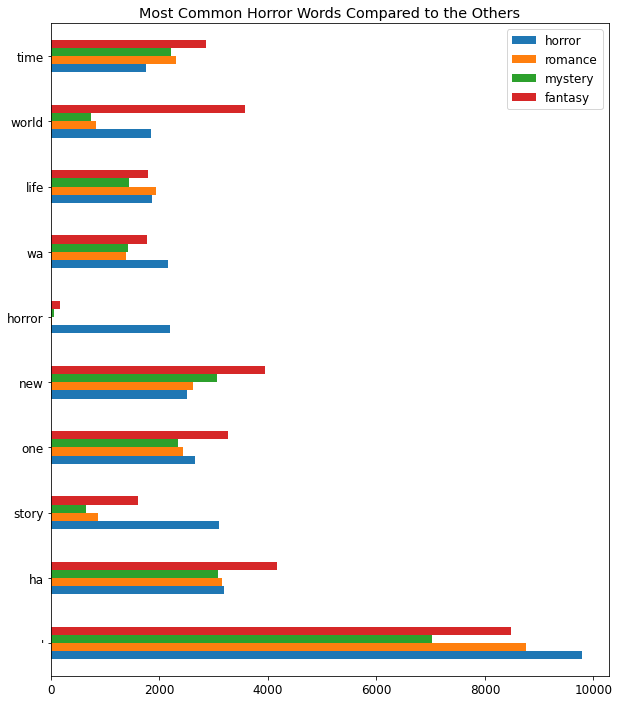

In [72]:
plt.rc('font', size=12)
word_counts.sort_values('horror', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Horror Words Compared to the Others')
plt.show()

How do the most common words in the romance genre compare against the others?

<Figure size 576x864 with 0 Axes>

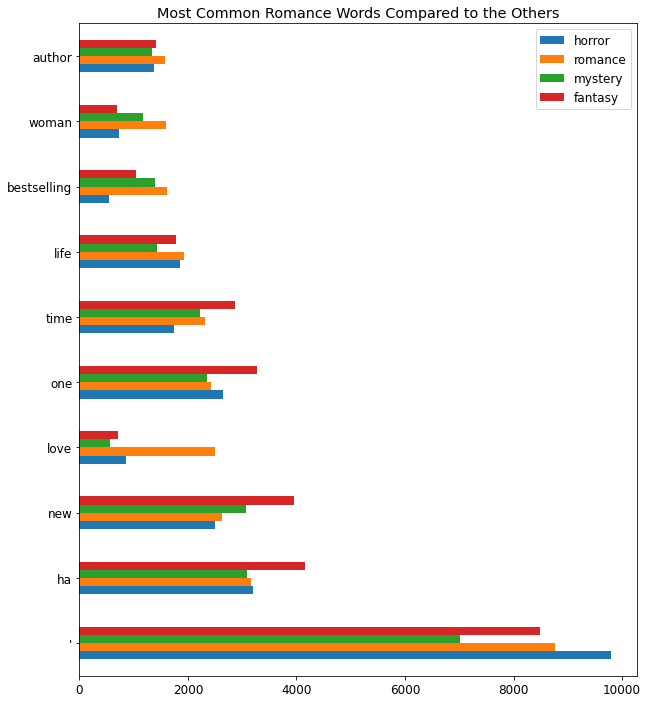

In [70]:
plt.rc('font', size=12)
word_counts.sort_values('romance', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Romance Words Compared to the Others')
plt.show()

How do the most common words in the Mystery and Crime genre compare against the others?

<Figure size 576x864 with 0 Axes>

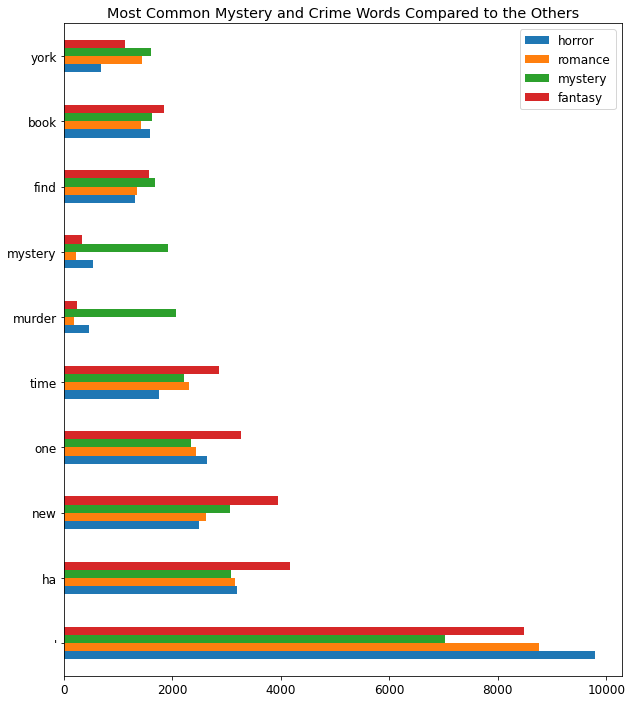

In [69]:
plt.rc('font', size=12)
word_counts.sort_values('mystery', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Mystery and Crime Words Compared to the Others')
plt.show()

How do the most common words in Sci-Fi and Fantasy compare against the others?

<Figure size 576x864 with 0 Axes>

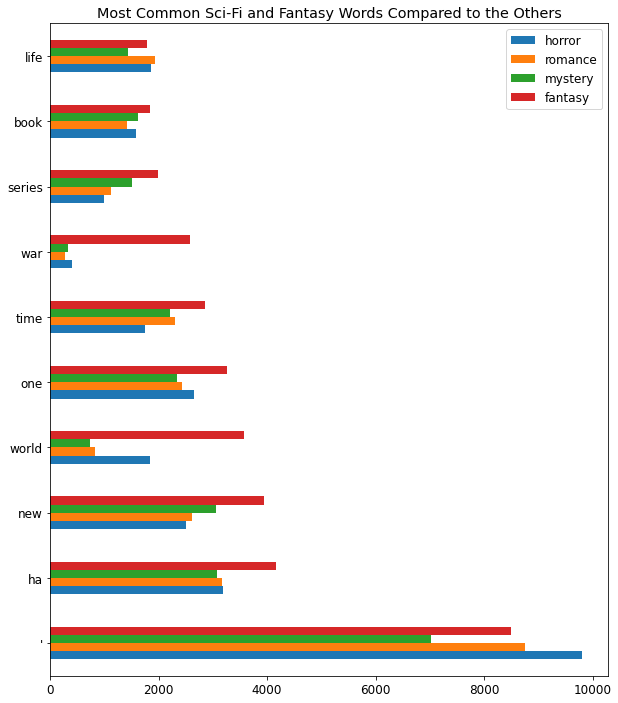

In [68]:
plt.rc('font', size=12)
word_counts.sort_values('fantasy', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Sci-Fi and Fantasy Words Compared to the Others')
plt.show()

### Bigrams

What are the most common bigrams among all genres?

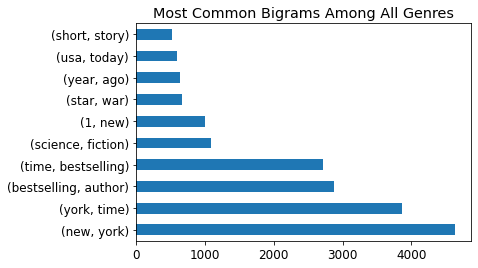

In [78]:
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Bigrams Among All Genres')
plt.show()

What are the most common bigrams in the horror genre?

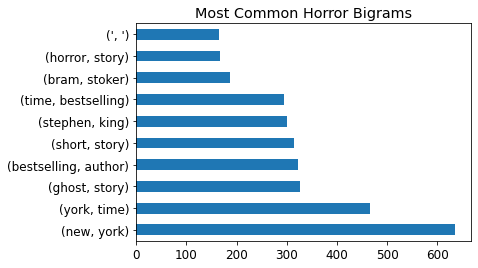

In [82]:
pd.Series(nltk.bigrams(horror_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Horror Bigrams')
plt.show()

What are the most common bigrams in the Romance genre?

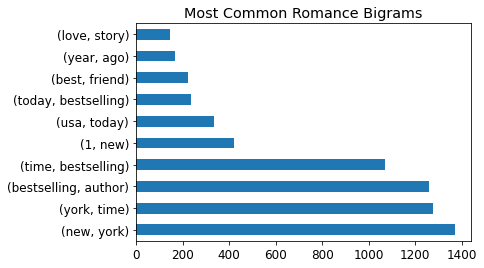

In [83]:
pd.Series(nltk.bigrams(romance_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Romance Bigrams')
plt.show()

What are the most common bigrams in the Mystery and Crime genre?

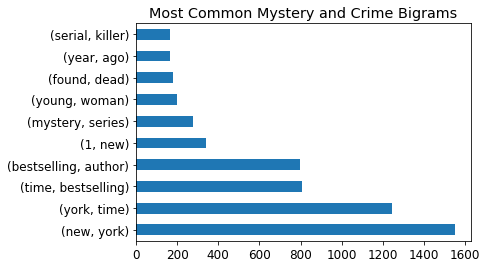

In [84]:
pd.Series(nltk.bigrams(mystery_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Mystery and Crime Bigrams')
plt.show()

What are the most common bigrams in the Sci-Fi and Fantasy genre?

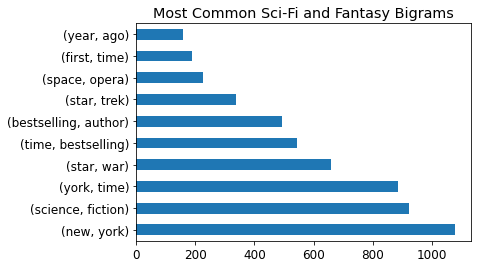

In [85]:
pd.Series(nltk.bigrams(fantasy_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Sci-Fi and Fantasy Bigrams')
plt.show()

How do the most common bigrams in the horror genre compare to the others? I'll have to create a new dataframe, just like before in order to visualize the differences.

In [86]:
#Create individual series of bigram counts for each genre
horror_bigrams = pd.Series(nltk.bigrams(horror_words.split())).value_counts()
romance_bigrams = pd.Series(nltk.bigrams(romance_words.split())).value_counts()
mystery_bigrams = pd.Series(nltk.bigrams(mystery_words.split())).value_counts()
fantasy_bigrams = pd.Series(nltk.bigrams(fantasy_words.split())).value_counts()

In [87]:
bigram_counts = pd.concat([horror_bigrams, romance_bigrams, mystery_bigrams, fantasy_bigrams], axis=1).fillna(0).astype(int)
bigram_counts.columns = ['horror', 'romance', 'mystery', 'fantasy']
bigram_counts.head()

,,horror,romance,mystery,fantasy
new,york,635,1370,1551,1077
york,time,465,1275,1246,885
ghost,story,327,2,3,3
bestselling,author,322,1259,796,494
short,story,315,13,54,134


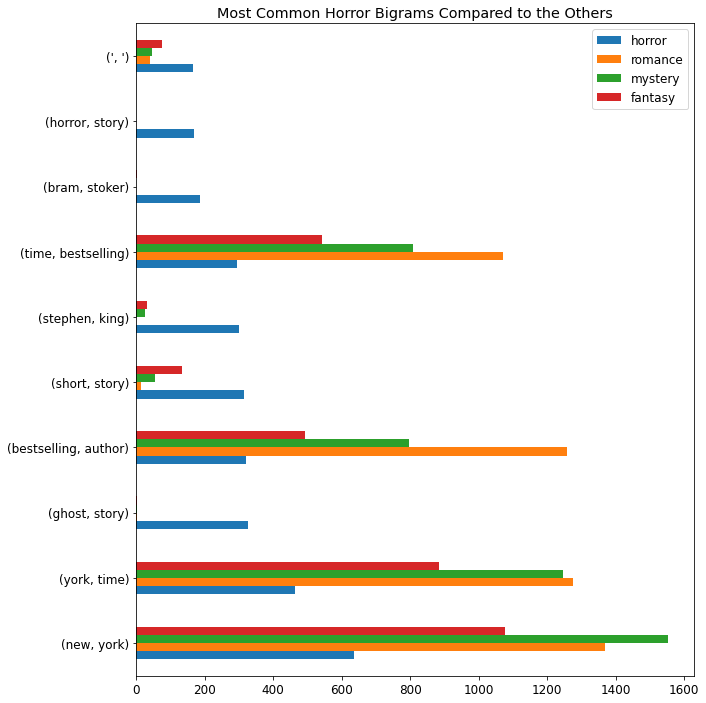

In [88]:
plt.rc('font', size=12)
bigram_counts.sort_values('horror', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Horror Bigrams Compared to the Others')
plt.show()

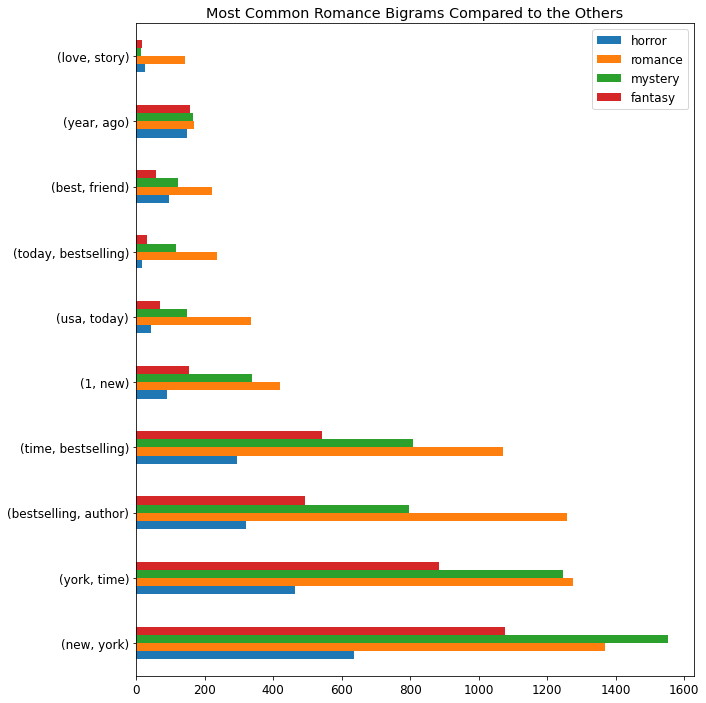

In [89]:
plt.rc('font', size=12)
bigram_counts.sort_values('romance', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Romance Bigrams Compared to the Others')
plt.show()

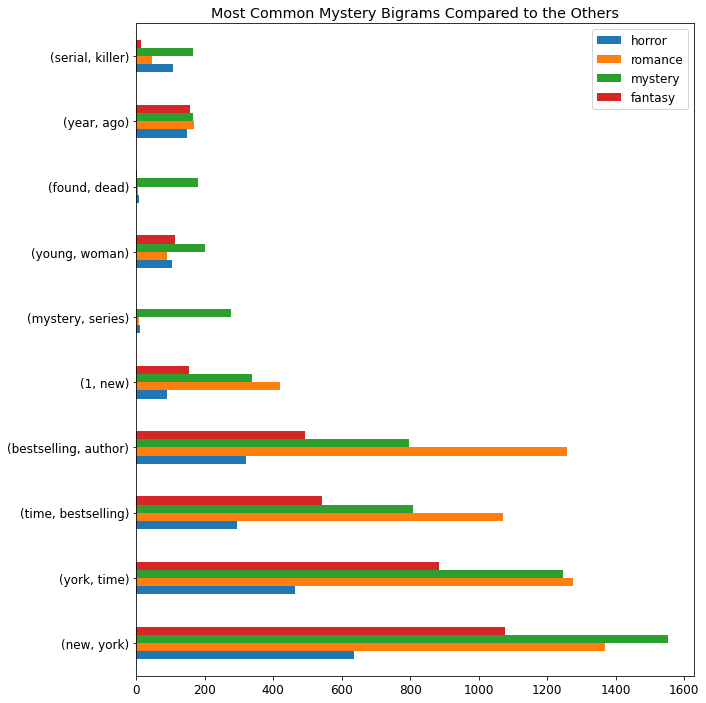

In [90]:
plt.rc('font', size=12)
bigram_counts.sort_values('mystery', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Mystery Bigrams Compared to the Others')
plt.show()

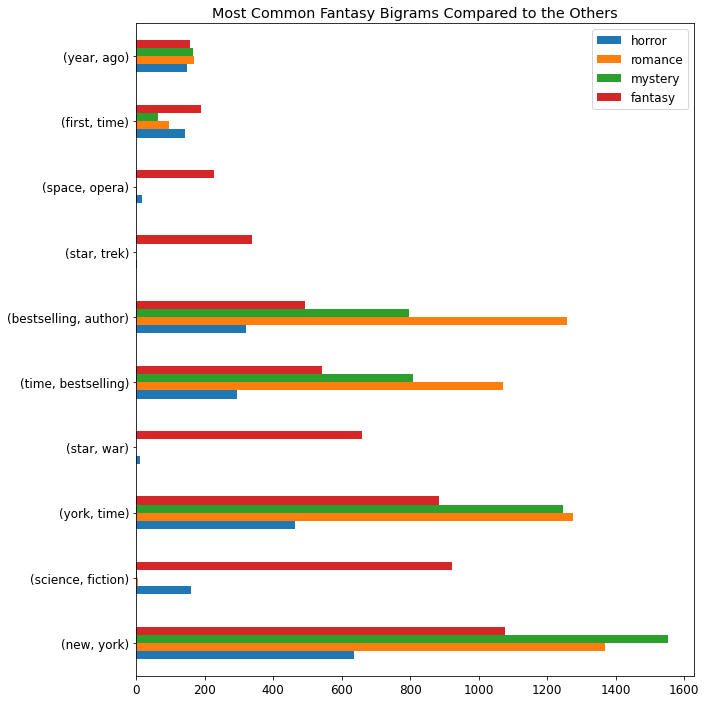

In [91]:
plt.rc('font', size=12)
bigram_counts.sort_values('fantasy', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Fantasy Bigrams Compared to the Others')
plt.show()

### Trigrams

What are the most common trigrams amongst all genres?

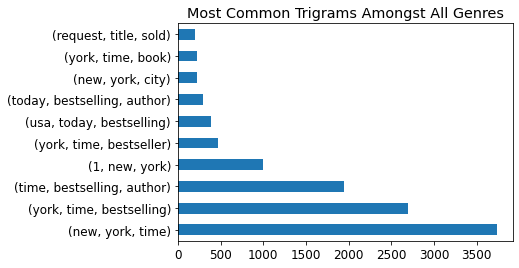

In [92]:
pd.Series(nltk.trigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Trigrams Amongst All Genres')
plt.show()

What are the most common trigrams in the horror genre?

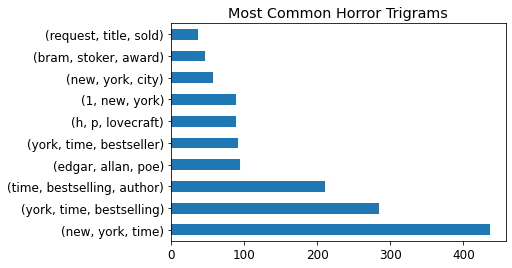

In [93]:
pd.Series(nltk.trigrams(horror_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Horror Trigrams')
plt.show()

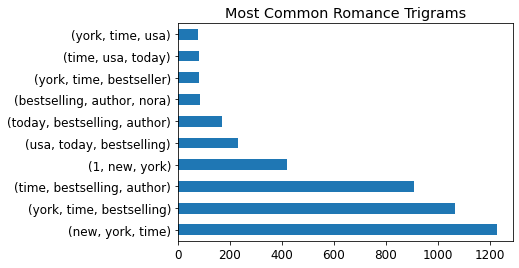

In [94]:
pd.Series(nltk.trigrams(romance_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Romance Trigrams')
plt.show()

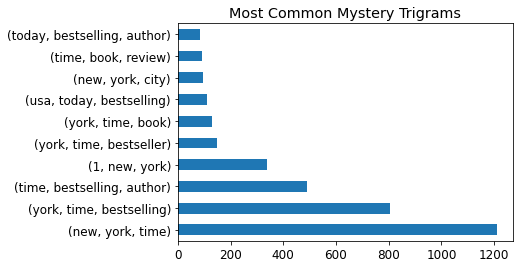

In [95]:
pd.Series(nltk.trigrams(mystery_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Mystery Trigrams')
plt.show()

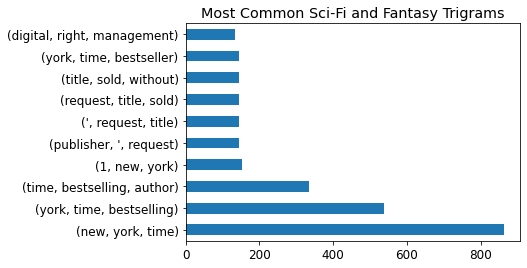

In [96]:
pd.Series(nltk.trigrams(fantasy_words.split())).value_counts().head(10).plot.barh()
plt.title('Most Common Sci-Fi and Fantasy Trigrams')
plt.show()

How do the most common Horror trigrams compare against the others? I have to create another dataframe.

In [97]:
#Create individual series of bigram counts for each genre
horror_trigrams = pd.Series(nltk.trigrams(horror_words.split())).value_counts()
romance_trigrams = pd.Series(nltk.trigrams(romance_words.split())).value_counts()
mystery_trigrams = pd.Series(nltk.trigrams(mystery_words.split())).value_counts()
fantasy_trigrams = pd.Series(nltk.trigrams(fantasy_words.split())).value_counts()

In [98]:
trigram_counts = pd.concat([horror_trigrams, romance_trigrams, mystery_trigrams, fantasy_trigrams], axis=1).fillna(0).astype(int)
trigram_counts.columns = ['horror', 'romance', 'mystery', 'fantasy']
trigram_counts.head()

,,,horror,romance,mystery,fantasy
new,york,time,436,1226,1210,864
york,time,bestselling,285,1066,805,539
time,bestselling,author,211,909,491,335
edgar,allan,poe,94,1,6,5
york,time,bestseller,91,82,150,145


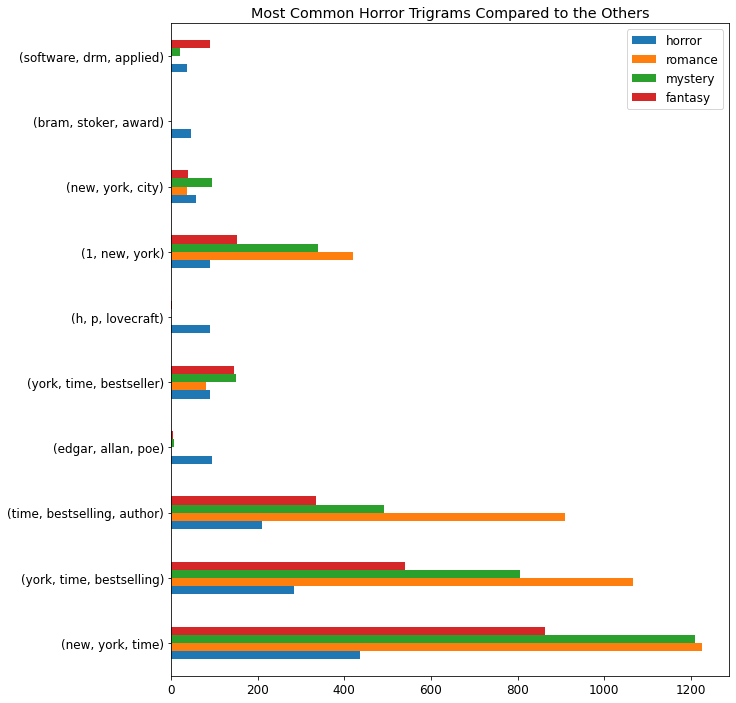

In [100]:
plt.rc('font', size=12)
trigram_counts.sort_values('horror', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Horror Trigrams Compared to the Others')
plt.show()

How do the most common romance trigrams compare against the others?

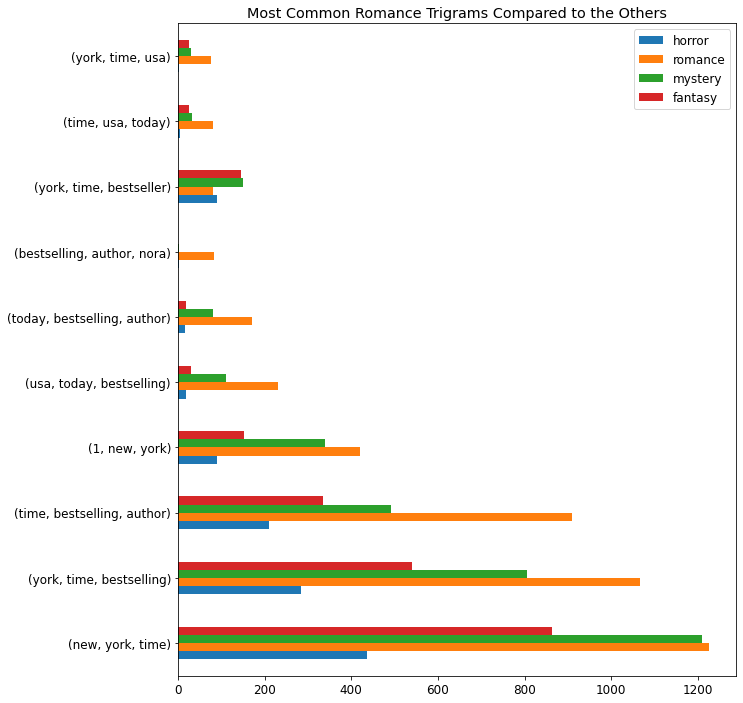

In [101]:
plt.rc('font', size=12)
trigram_counts.sort_values('romance', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Romance Trigrams Compared to the Others')
plt.show()

How do the most common Mystery and Crime trigrams compare against the others?

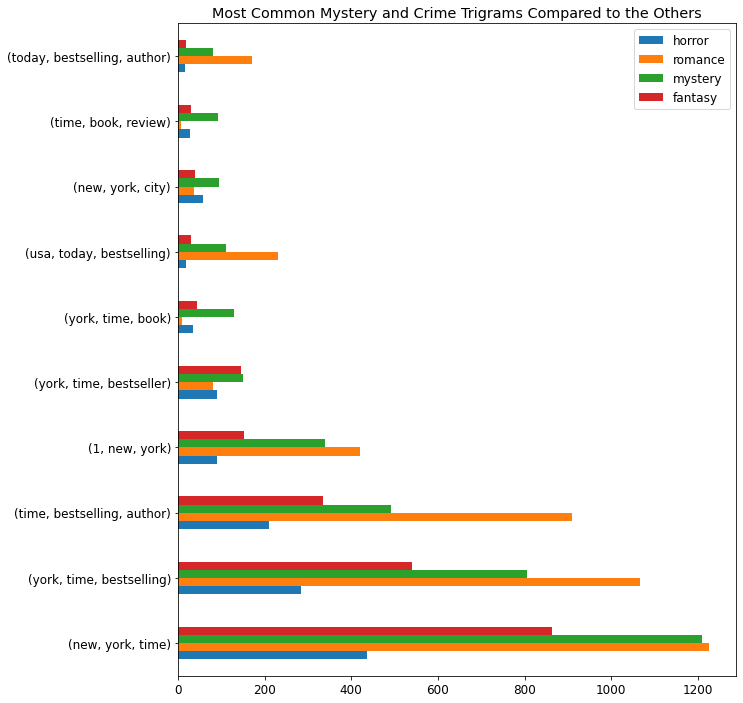

In [102]:
plt.rc('font', size=12)
trigram_counts.sort_values('mystery', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Mystery and Crime Trigrams Compared to the Others')
plt.show()

How do the most common Sci-Fi and Fantasy trigrams compare to the others?

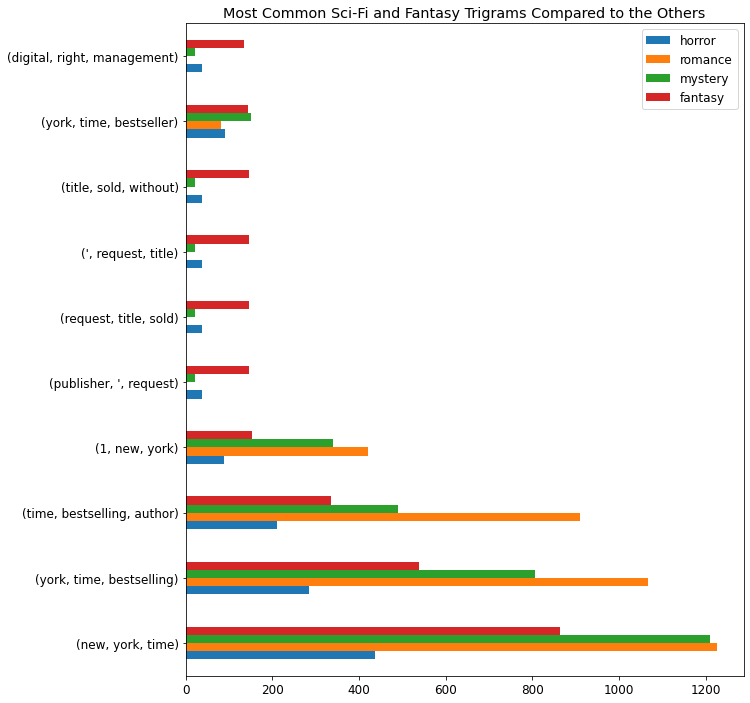

In [103]:
plt.rc('font', size=12)
trigram_counts.sort_values('fantasy', ascending=False).head(10)[['horror', 'romance', 'mystery', 'fantasy']].plot.barh(figsize = (10,12))
plt.title('Most Common Sci-Fi and Fantasy Trigrams Compared to the Others')
plt.show()

Key Takeaways:

* For iterations beyond the MVP, I will need to add more words to the stop-words list. Things like 'New', 'York', 'Time', 'Bestselling', 'usa', 'today', 'review', 'author', etc.
* There do appear to be some distinctions between genres, but a lot of them also have the same top bigrams and trigrams.
* I think they would still be useful in a model though.